In [14]:
from qiskit.circuit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.converters import circuit_to_dag
from qiskit.visualization import dag_drawer
import numpy as np

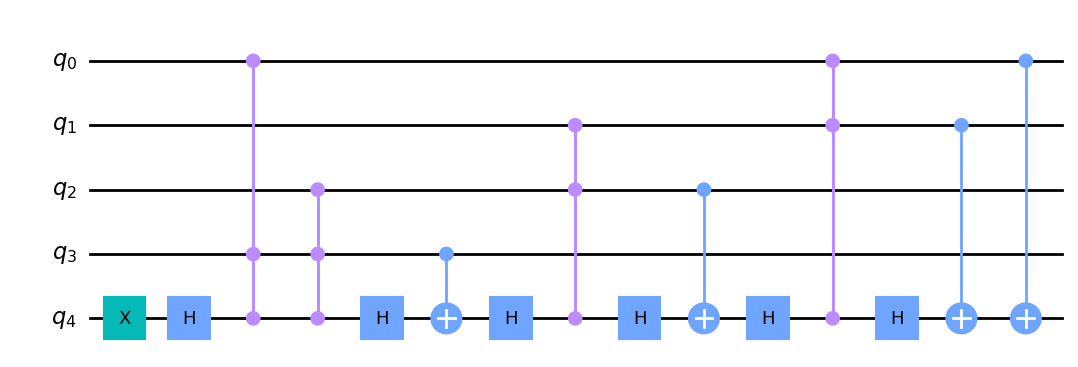

In [15]:
# Taken from https://github.com/Quantomatic/pyzx/blob/master/circuits/Fast/mod5_4_before
qc = QuantumCircuit(5)
qc.x(4)
qc.h(4)
qc.ccz(0, 3, 4)
qc.ccz(2, 3, 4)
qc.h(4)
qc.cx(3, 4)
qc.h(4)
qc.ccz(1, 2, 4)
qc.h(4)
qc.cx(2, 4)
qc.h(4)
qc.ccz(0, 1, 4)
qc.h(4)
qc.cx(1, 4)
qc.cx(0, 4)

qc.draw(output='mpl', style='clifford')

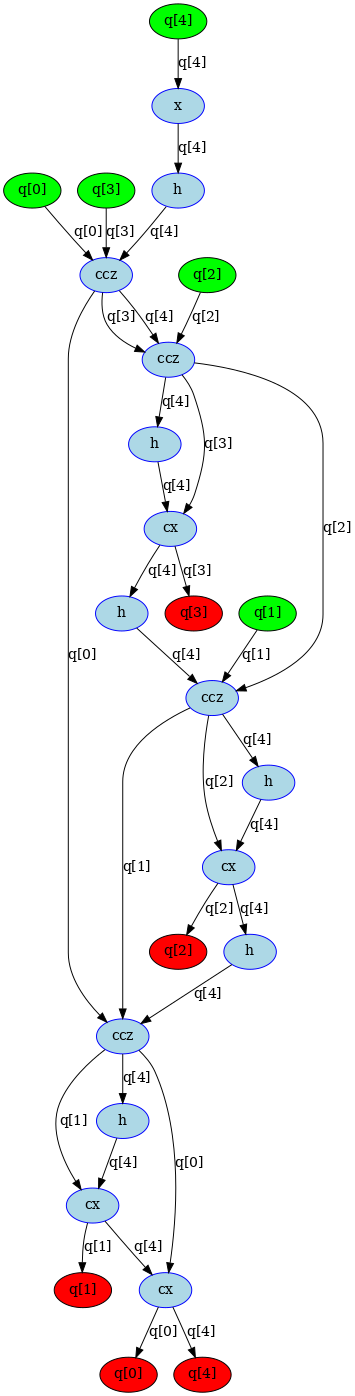

In [16]:
dag = circuit_to_dag(qc)
dag_drawer(dag)

In [17]:
from qiskit.transpiler import PassManager
from zxpass import ZXPass

zxpass = ZXPass()
pass_manager = PassManager(zxpass)

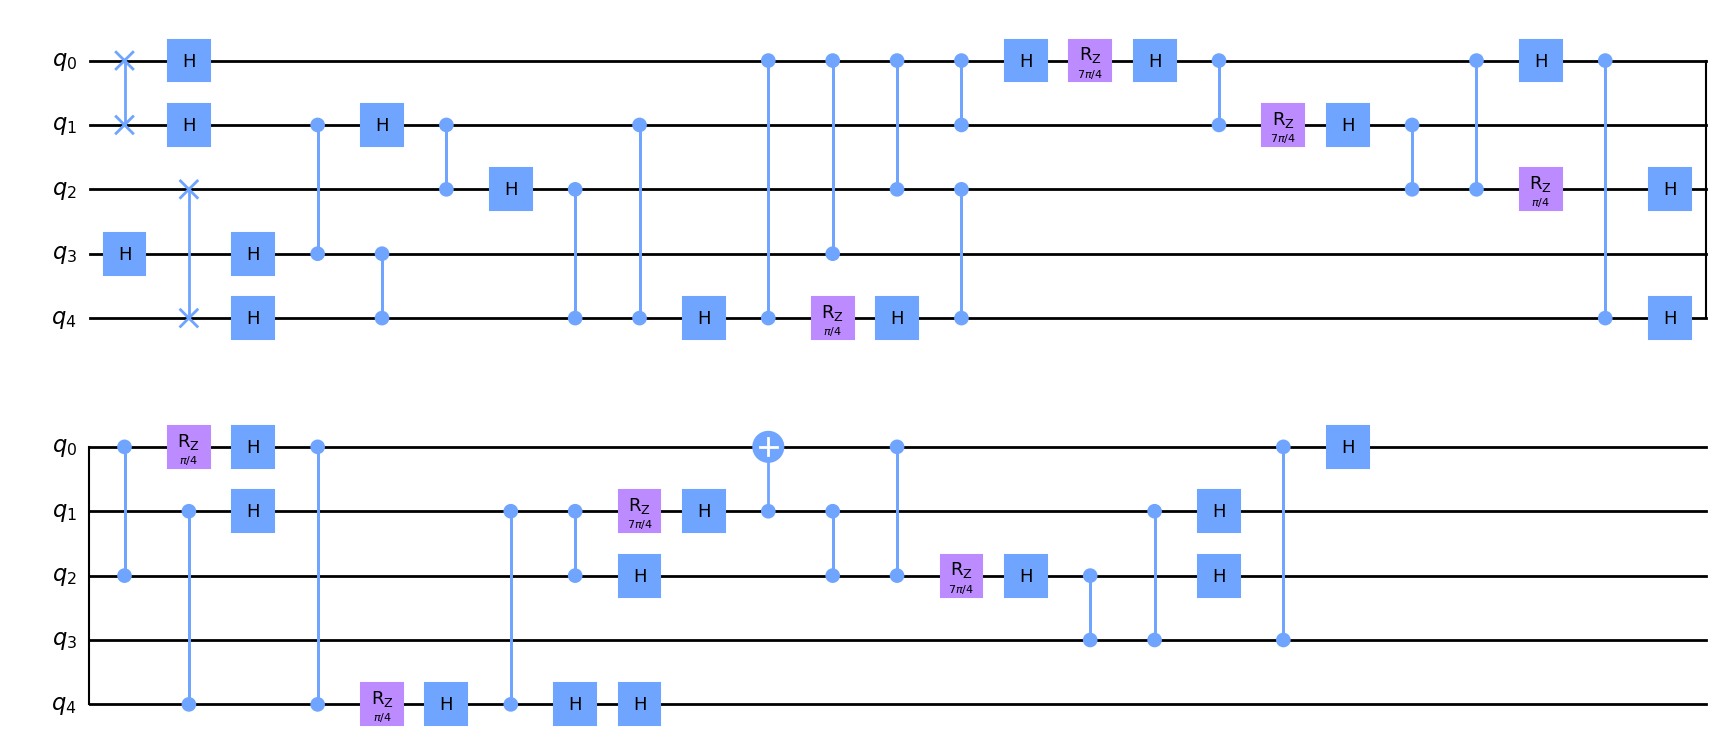

In [18]:
zx_qc = pass_manager.run(qc)
zx_qc.draw(output='mpl', style='clifford')

In [19]:
from qiskit.quantum_info import Statevector
print("original circuit depth:", qc.depth())
print("PyZX circuit depth:", zx_qc.depth())
print(Statevector.from_instruction(qc).equiv(Statevector.from_instruction(zx_qc)))

original circuit depth:  15
PyZX circuit depth:  42
True


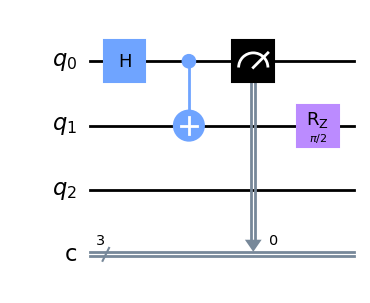

In [75]:
# From https://github.com/Qiskit/qiskit-tutorials/blob/master/tutorials/circuits_advanced/04_transpiler_passes_and_passmanager.ipynb

from math import pi

q = QuantumRegister(3, 'q')
c = ClassicalRegister(3, 'c')
qc = QuantumCircuit(q, c)
qc.h(q[0])
qc.cx(q[0], q[1])
qc.measure(q[0], c[0])
qc.rz(0.5*pi, q[1]).c_if(c, 2)

qc.draw(output='mpl', style='clifford')

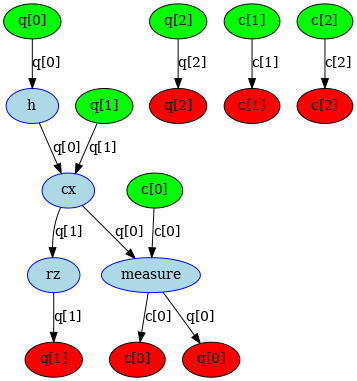

In [76]:
dag = circuit_to_dag(qc)
dag_drawer(dag)

In [77]:
import pyzx as zx

circuits_and_nodes = zxpass._dag_to_circuits_and_nodes(dag)
print("dag:", len(dag.op_nodes()))
for op_node in dag.op_nodes():
    print(op_node)
print("circuits and nodes:", len(circuits_and_nodes))
for circuit_or_node in circuits_and_nodes:
    print(circuit_or_node)
    if isinstance(circuit_or_node, zx.Circuit):
        zx.draw(circuit_or_node.to_graph())
print(circuits_and_nodes[1] == dag.op_nodes()[2])

dag: 4
125467455108528
125467453289824
125467453289584
125467453289424
circuits and nodes: 2
Circuit(3 qubits, 0 bits, 3 gates)


125467453289584
True


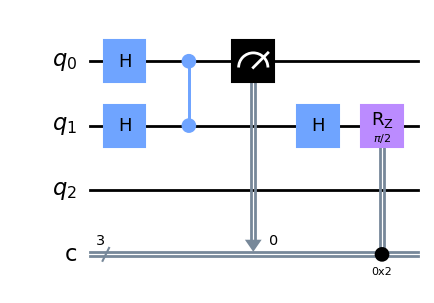

In [72]:
zx_qc = pass_manager.run(qc)
zx_qc.draw(output='mpl', style='clifford')

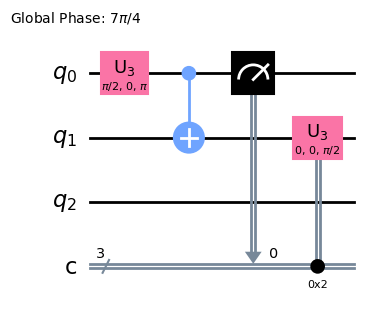

In [73]:
from qiskit import transpile
opt_qc = transpile(qc, basis_gates=['u3', 'cx'], optimization_level=3)
opt_qc.draw(output='mpl', style='clifford')

In [74]:
from qiskit.quantum_info import Statevector
print("original circuit depth:", qc.depth())
print("transpiled circuit depth:", opt_qc.depth())
print("PyZX circuit depth:", zx_qc.depth())
print(Statevector.from_instruction(qc).equiv(Statevector.from_instruction(zx_qc)))

original circuit depth:  4
transpiled circuit depth:  4
PyZX circuit depth:  4


QiskitError: 'Cannot apply instruction with classical bits: measure'